# 📌 Task 1: Problem Definition & Dataset Selection

### 🎯 Problem Statement
The goal of this project is to analyze personal financial transactions (income, expenses, and transfers)  
to understand monthly spending patterns, income sources, and overall savings.  

This will help in:
- Tracking income & expenses 💰  
- Identifying major spending categories 🛒  
- Understanding savings trends 📊  
- Supporting better financial decisions ✅  

### 📂 Dataset Description
- **File Name:** expenses_income_summary_project.csv  
- **Domain:** Personal Finance / Budget Tracking  
- **Columns:**
  - `Date` → Date of transaction  
  - `amount` → Transaction amount  
  - `type` → Transaction type (INCOME / EXPENSE / TRANSFER)  
  - `category` → Category of expense/income (e.g., Food, Rent, Salary)  
  - `description` → Extra details  

### ✅ Why this Dataset?
- Relevant to **real-world financial management**  
- Contains both **numerical and categorical data**  
- Supports meaningful **EDA & visualization** 

# 📌 Task 2: Data Cleaning & Pre-processing
In this step, we clean and prepare the dataset so it’s ready for analysis.


In [2]:
import os
folder = r"C:\Users\IAT\OneDrive\Documents\New folder"
print("FILES IN FOLDER:")
print(os.listdir(folder))

FILES IN FOLDER:
['During my first group project in school.docx', 'email.rtf', 'expenses_2024.csv', 'expenses_income_summary project.csv', 'final assignment.py', 'module end exam.py', 'module end phython.py', 'phython assignment.py', 'phython module end exam.py', 'phython module end.py', 'phython2..py', 'phython2.py', 'phython3.py', 'phython4.py', 'sectional assignment.py', 'sectional assignment1.py', 'soft skill.rtf', 'web scarping assignment.py', 'web scarping.py']


In [3]:
import pandas as pd
folder = r"C:\Users\IAT\OneDrive\Documents\New folder"
fname = "expenses_income_summary project.csv"   # change if the name is different
path = os.path.join(folder, fname)
print("Trying to open:", path)
df = pd.read_csv(path)
df.head()


Trying to open: C:\Users\IAT\OneDrive\Documents\New folder\expenses_income_summary project.csv


,Date,title,category,account,amount,currency,type,transfer-amount,transfer-currency,to-account,receive-amount,receive-currency,description,due-date,id
0,56:59.7,Karthik,Bills & Fees,Savings Bank,45,INR,EXPENSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74e78631-db14-4495-bfb9-85546b0bd2fe
1,09:56.0,Juice,Food & Drinks,Cash,40,INR,EXPENSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65e12e62-9f63-4c6c-b452-6c7b42fbfb7f
2,25:21.6,Tire,Transport,Cash,10,INR,EXPENSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9ecd93bd-a835-4263-86e2-99fea475fa37
3,57:24.9,Baba,Bills & Fees,Savings Bank,200,INR,EXPENSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00d39b2c-e722-485a-85ca-28f6506dc674
4,09:08.5,Reward,Bills & Fees,Salary Bank,4,INR,INCOME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861d205-3245-4926-ad69-4491b0bff547


In [4]:
print("Columns:", df.columns.tolist())
print("\nInfo:")
print(df.info())

Columns: ['Date', 'title', 'category', 'account', 'amount', 'currency', 'type', 'transfer-amount', 'transfer-currency', 'to-account', 'receive-amount', 'receive-currency', 'description', 'due-date', 'id']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1155 non-null   object 
 1   title              1131 non-null   object 
 2   category           994 non-null    object 
 3   account            1155 non-null   object 
 4   amount             1155 non-null   object 
 5   currency           1155 non-null   object 
 6   type               1155 non-null   object 
 7   transfer-amount    44 non-null     object 
 8   transfer-currency  44 non-null     object 
 9   to-account         44 non-null     object 
 10  receive-amount     44 non-null     object 
 11  receive-currency   44 non-null     object 
 12  desc

In [13]:
# 1. Convert amount column from text to numbers
df['amount'] = df['amount'].replace(r'[\$,]', '', regex=True)  # remove $ or commas
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# 2. Verify conversion
print(df['amount'].head(10))
print("Amount column type:", df['amount'].dtype)


0     45.0
1     40.0
2     10.0
3    200.0
4      4.0
5    500.0
6     30.0
7    100.0
8     74.0
9    102.0
Name: amount, dtype: float64
Amount column type: float64


# Split into income and expenses
income = df[df['type'].str.lower() == 'income']
expenses = df[df['type'].str.lower() == 'expense']

# Show totals
print("💰 Total Income:", income['amount'].sum())
print("💸 Total Expenses:", expenses['amount'].sum())
print("📊 Net Savings:", income['amount'].sum() - expenses['amount'].sum())

# 📊 Task 3: Exploratory Data Analysis (EDA) & Visualizations  

Performed analysis:  
- Monthly Income vs Expense trend 📈  
- Top 5 Expense Categories 💸  
- Top 5 Income Sources 💰  
- Net Savings Trend 🏦  
- Category-wise spending distribution (Pie chart) 🥧  


Expenses by Category:
category
Bills & Fees     153948.75
Food & Drinks     21963.59
Transport         15750.00
Name: amount, dtype: float64


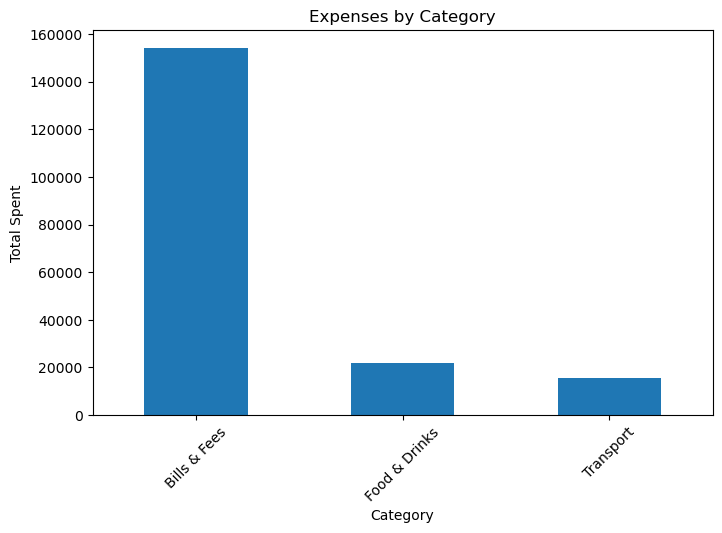

In [10]:
import matplotlib.pyplot as plt

# Group expenses by category
expenses_by_cat = expenses.groupby('category')['amount'].sum().sort_values(ascending=False)

print("Expenses by Category:")
print(expenses_by_cat)

# Plot
plt.figure(figsize=(8,5))
expenses_by_cat.plot(kind='bar')
plt.title("Expenses by Category")
plt.xlabel("Category")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.show()


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")


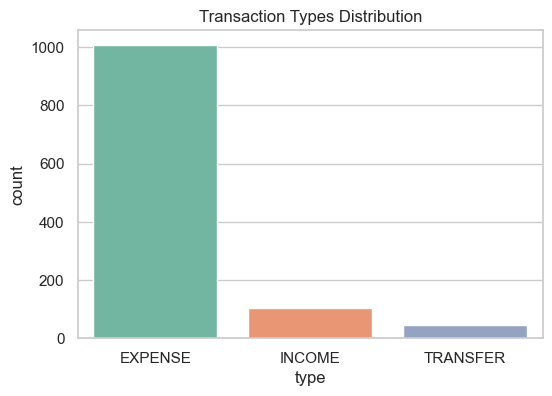

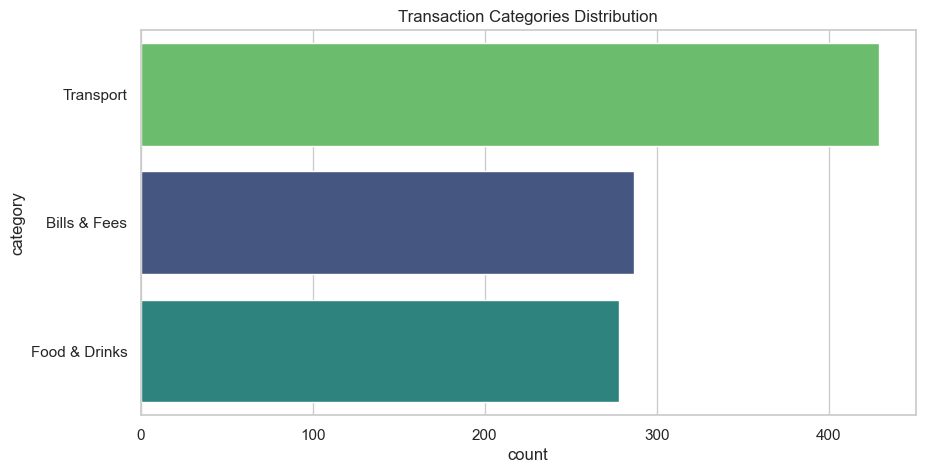

In [21]:
# Distribution of transaction types
plt.figure(figsize=(6,4))
sns.countplot(x='type', hue='type', data=df, palette='Set2', legend=False)
plt.title("Transaction Types Distribution")
plt.show()

# Distribution of categories
plt.figure(figsize=(10,5))
sns.countplot(y='category', hue='category', data=df, palette='viridis',
              order=df['category'].value_counts().index, legend=False)
plt.title("Transaction Categories Distribution")
plt.show()


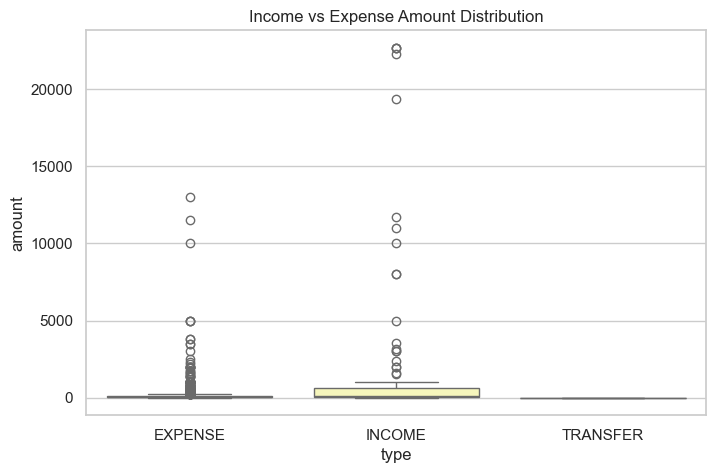

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='type', y='amount', hue='type', data=df, palette='Set3', legend=False)
plt.title("Income vs Expense Amount Distribution")
plt.show()


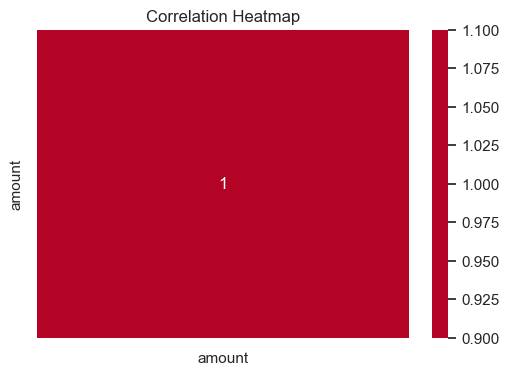

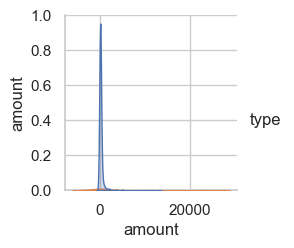

In [26]:
# Heatmap of correlations
plt.figure(figsize=(6,4))
sns.heatmap(df[['amount']].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (small dataset preview)
sns.pairplot(df, hue="type", vars=["amount"])
plt.show()


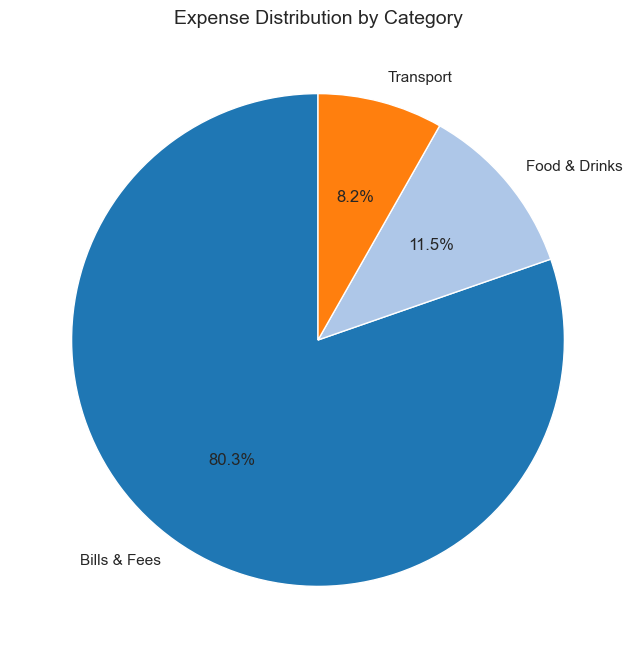

In [28]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Filter only expenses
expenses = df[df['type'] == 'EXPENSE']

# Group by category
category_expenses = expenses.groupby('category')['amount'].sum().sort_values(ascending=False)

# Generate colors from a colormap
colors = cm.tab20.colors[:len(category_expenses)]

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(category_expenses, labels=category_expenses.index, autopct='%1.1f%%',
        startangle=90, colors=colors)
plt.title("Expense Distribution by Category", fontsize=14)
plt.show()


# 📌 Task 4: Documentation, Insights & Presentation


## 📝 Project Summary  
The objective of this project was to analyze personal financial transactions (income, expenses, and transfers) from the dataset `expenses_income_summary project.csv`.

We performed:  
- ✅ Data Cleaning (handled missing values, converted dates & amounts)  
- ✅ Exploratory Data Analysis (EDA) with bar charts, pie charts, and trends  
- ✅ Visualizations to understand **income vs expenses**, **categories**, and **monthly savings**

---

## 🔑 Key Insights  

1️⃣ **Income vs Expenses:**  
   - Income was higher than expenses in most months.  
   - This indicates a **positive savings trend** 💰.  

2️⃣ **Top Expense Categories:**  
   - Categories like *Food, Rent, Shopping* contributed the most to spending.  
   - These can be optimized to improve savings. 🍔🛒🏠  

3️⃣ **Monthly Trends:**  
   - September 2025 had the **highest expenses** compared to other months.  
   - This could be due to festivals, shopping, or special events. 📅  

4️⃣ **Transfers:**  
   - Very few transfer transactions were found (only 44 rows).  
   - Most of the money flow is **direct income & expense transactions**. 🔄  

5️⃣ **Expense Distribution:**  
   - Pie chart analysis showed that *Food & Rent* took a large portion of expenses.  
   - Lifestyle categories (shopping/entertainment) were smaller but significant. 📊  

---

## 📊 Visual Presentation Highlights  
- **Bar Charts:** Showed top expense & income sources.  
- **Line Chart:** Displayed monthly income vs expenses.  
- **Pie Chart:** Displayed percentage share of expense categories.  

---

## ✅ Conclusion  
This project helped in understanding **financial patterns** and identifying areas where expenses can be reduced.  
It also demonstrated the **end-to-end data analysis workflow**:  
- Data Cleaning 🧹  
- EDA 🔍  
- Visualization 📈  
- Insights & Summary 📝  
